Import Necessary Packages

In [1]:
import numpy as np
import pandas as pd
from collections import Counter, defaultdict
from matplotlib import pyplot as plt
import os
import zipfile


Upload the data to Python, Summer, Winter and Dictionary

In [2]:
summer = pd.read_csv('data/summer.csv')
winter = pd.read_csv('data/winter.csv')
dct = pd.read_csv('data/dictionary.csv')

Check data

In [3]:
winter[0:5]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [4]:
summer[0:5]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [5]:
summer.columns

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender',
       'Event', 'Medal'],
      dtype='object')

In [6]:
summer.shape

(31165, 9)

In [7]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
Year          31165 non-null int64
City          31165 non-null object
Sport         31165 non-null object
Discipline    31165 non-null object
Athlete       31165 non-null object
Country       31161 non-null object
Gender        31165 non-null object
Event         31165 non-null object
Medal         31165 non-null object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


Found 4 empty cell for countries, will try to change them, using data in Wikipedia to update the values.

In [8]:
summer.loc[summer['Country'].isna()]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31110,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver


In [9]:
summer.loc[(summer['Year']== 2012) & (summer['Sport'] == 'Weightlifting') & (summer['Event'] == '63KG')]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31073,2012,London,Weightlifting,Weightlifting,"TSARUKAEVA, Svetlana",RUS,Women,63KG,Silver
31074,2012,London,Weightlifting,Weightlifting,"GIRARD, Christine",CAN,Women,63KG,Bronze


In [10]:
summer.loc[summer['Athlete'] == 'KUDUKHOV, Besik', 'Country'] = 'RUS'
summer.loc[(summer['Year']== 2012) & (summer['Sport'] == 'Weightlifting') 
           & (summer['Event'] == '63KG') & (summer['Medal'] == 'Gold'), ['Athlete', 'Country']] = ['GIRARD, Christine', 'CAN']
summer.loc[(summer['Year']== 2012) & (summer['Sport'] == 'Weightlifting')  
           & (summer['Event'] == '63KG') & (summer['Medal'] == 'Bronze'),['Athlete', 'Country']] = ['ACOSTA, Luz', 'MEX']
summer.loc[(summer['Year']== 2012) & (summer['Sport'] == 'Weightlifting') & (summer['Event'] == '63KG')]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
31072,2012,London,Weightlifting,Weightlifting,"GIRARD, Christine",CAN,Women,63KG,Gold
31073,2012,London,Weightlifting,Weightlifting,"TSARUKAEVA, Svetlana",RUS,Women,63KG,Silver
31074,2012,London,Weightlifting,Weightlifting,"ACOSTA, Luz",MEX,Women,63KG,Bronze


In [11]:
summer.loc[(summer['Year']== 2012) & (summer['Sport'] == 'Weightlifting') & (summer['Event'] == '94KG')]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
31090,2012,London,Weightlifting,Weightlifting,"MOHAMMADPOURKARKARAGH, Saeid",IRI,Men,94KG,Gold
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31092,2012,London,Weightlifting,Weightlifting,"KIM, Minjae",KOR,Men,94KG,Bronze


In [13]:
summer.loc[(summer['Year']== 2012) & (summer['Sport'] == 'Weightlifting')  
           & (summer['Event'] == '94KG') & (summer['Medal'] == 'Silver'),['Athlete', 'Country']] = ['KIM, Minjae','KOR']
summer.loc[(summer['Year']== 2012) & (summer['Sport'] == 'Weightlifting')  
           & (summer['Event'] == '94KG') & (summer['Medal'] == 'Bronze'),['Athlete', 'Country']] = ['Zieliński'.upper()+', Tomasz', 'POL']
summer.loc[(summer['Year']== 2012) & (summer['Sport'] == 'Weightlifting') & (summer['Event'] == '94KG')]


,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
31090,2012,London,Weightlifting,Weightlifting,"MOHAMMADPOURKARKARAGH, Saeid",IRI,Men,94KG,Gold
31091,2012,London,Weightlifting,Weightlifting,"KIM, Minjae",KOR,Men,94KG,Silver
31092,2012,London,Weightlifting,Weightlifting,"ZIELIŃSKI, Tomasz",POL,Men,94KG,Bronze


In [14]:
summer.loc[(summer['Year']== 2012) & (summer['Sport'] == 'Athletics') & (summer['Event'] == '1500M')]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29600,2012,London,Athletics,Athletics,"MAKHLOUFI, Taoufik",ALG,Men,1500M,Gold
29601,2012,London,Athletics,Athletics,"MANZANO, Leonel",USA,Men,1500M,Silver
29602,2012,London,Athletics,Athletics,"IGUIDER, Abdalaati",MAR,Men,1500M,Bronze
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
29604,2012,London,Athletics,Athletics,"BULUT, Gamze",TUR,Women,1500M,Silver
29605,2012,London,Athletics,Athletics,"JAMAL, Maryam Yusuf",BRN,Women,1500M,Bronze


In [20]:
summer.loc[(summer['Year']== 2012) & (summer['Sport'] == 'Athletics')  
           & (summer['Event'] == '1500M') & (summer['Medal'] == 'Gold') & (summer['Gender'] == 'Women')
           , ['Athlete', 'Country']] = ['JAMAL, Maryam Yusuf','BRN']
summer.loc[(summer['Year']== 2012) & (summer['Sport'] == 'Athletics')  
           & (summer['Event'] == '1500M') & (summer['Medal'] == 'Silver') & (summer['Gender'] == 'Women')
           ,['Athlete', 'Country']] = ['Tomashova'.upper()+', Tatyana','RUS']
summer.loc[(summer['Year']== 2012) & (summer['Sport'] == 'Athletics')  
           & (summer['Event'] == '1500M') & (summer['Medal'] == 'Bronze') & (summer['Gender'] == 'Women')
           ,['Athlete', 'Country']] = ['Aregawi'.upper()+', Abeba','ETH']
summer.loc[(summer['Year']== 2012) & (summer['Sport'] == 'Athletics') & (summer['Event'] == '1500M')]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29600,2012,London,Athletics,Athletics,"MAKHLOUFI, Taoufik",ALG,Men,1500M,Gold
29601,2012,London,Athletics,Athletics,"MANZANO, Leonel",USA,Men,1500M,Silver
29602,2012,London,Athletics,Athletics,"IGUIDER, Abdalaati",MAR,Men,1500M,Bronze
29603,2012,London,Athletics,Athletics,"JAMAL, Maryam Yusuf",BRN,Women,1500M,Gold
29604,2012,London,Athletics,Athletics,"TOMASHOVA, Tatyana",RUS,Women,1500M,Silver
29605,2012,London,Athletics,Athletics,"AREGAWI, Abeba",ETH,Women,1500M,Bronze


In [21]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
Year          31165 non-null int64
City          31165 non-null object
Sport         31165 non-null object
Discipline    31165 non-null object
Athlete       31165 non-null object
Country       31165 non-null object
Gender        31165 non-null object
Event         31165 non-null object
Medal         31165 non-null object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


Since URS is now Russia, change all URS to RUS, Getting all FRG and GDR to be Germany as well

In [23]:
summer.loc[summer['Country'] == 'URS', 'Country'] = 'RUS'
summer.loc[summer['Country'] == 'FRG', 'Country'] = 'GER'
summer.loc[summer['Country'] == 'GDR', 'Country'] = 'GER'

Getting Athlete that won most medal for Men and Women (Using Counter)

In [24]:
for x in 'Men Women'.split():
    athlete = Counter(summer['Athlete'][summer.Gender == x])
    a = athlete.most_common(1)[0]
    name = ' '.join(a[0].title().split(', '))
    print('{} won the most number for medals for {}, total of {} medals'.format(name, x, a[1]))

Phelps Michael won the most number for medals for Men, total of 22 medals
Latynina Larisa won the most number for medals for Women, total of 18 medals


In [25]:
for x in 'Men Women'.split():
    country = Counter(summer['Country'][summer.Gender == x])
    print('Top 10 countries with most medal won for {}'.format(x))
    b = country.most_common(10)
    print(b)

Top 10 countries with most medal won for Men
[('USA', 3208), ('RUS', 1886), ('GER', 1747), ('GBR', 1412), ('FRA', 1254), ('ITA', 1161), ('SWE', 953), ('HUN', 834), ('AUS', 696), ('JPN', 525)]
Top 10 countries with most medal won for Women
[('USA', 1377), ('RUS', 933), ('GER', 873), ('CHN', 537), ('AUS', 493), ('NED', 356), ('ROU', 335), ('GBR', 308), ('JPN', 263), ('HUN', 245)]


In [26]:
check = Counter(summer.loc[(summer['Year'] >= 1896) & (summer['Year'] < 2013), 'Country'])
check = pd.DataFrame(check.most_common(10))
check.columns = ['Country', 'Medals']

Get top 10 Discipline based on my criteria

In [44]:
top10 = 'Swimming Athletics Fencing Football Hockey Basketball Boxing Weightlifting Tennis Volleyball'.split()

summer.loc[summer['Discipline'].isin(top10)  , 'Discipline'].value_counts()



Athletics        3638
Swimming         2628
Fencing          1613
Football         1497
Hockey           1422
Basketball       1012
Volleyball        934
Boxing            894
Weightlifting     593
Tennis            296
Name: Discipline, dtype: int64

In [47]:
top10_results = summer.loc[summer['Discipline'].isin(top10)]

top10_results.shape

(14527, 9)

In [79]:
top10_all = []
for x in top10:
    z = top10_results.loc[top10_results['Discipline'] == x, 'Country'].value_counts()[0:10]
    top10_all.append([x, z])
top10_all

[['Swimming', USA    895
  AUS    343
  GER    310
  RUS    137
  JPN    109
  NED    109
  GBR    106
  HUN     80
  CAN     76
  FRA     73
  Name: Country, dtype: int64], ['Athletics', USA    994
  RUS    339
  GER    313
  GBR    295
  FIN    128
  JAM    126
  FRA    106
  SWE    103
  KEN     86
  AUS     84
  Name: Country, dtype: int64], ['Fencing', ITA    344
  FRA    286
  HUN    227
  RUS    192
  GER    104
  POL     81
  USA     52
  BEL     44
  ROU     43
  SWE     26
  Name: Country, dtype: int64], ['Football', USA    132
  BRA    127
  GER    124
  RUS     91
  HUN     80
  YUG     73
  ARG     72
  ITA     53
  NOR     50
  DEN     48
  Name: Country, dtype: int64], ['Hockey', NED    249
  GER    207
  AUS    189
  IND    169
  GBR    126
  PAK    119
  ESP     78
  ARG     64
  KOR     48
  RUS     32
  Name: Country, dtype: int64], ['Basketball', USA    318
  RUS    181
  YUG     96
  AUS     60
  BRA     60
  FRA     38
  ESP     36
  LTU     36
  CHN     24
  BUL 

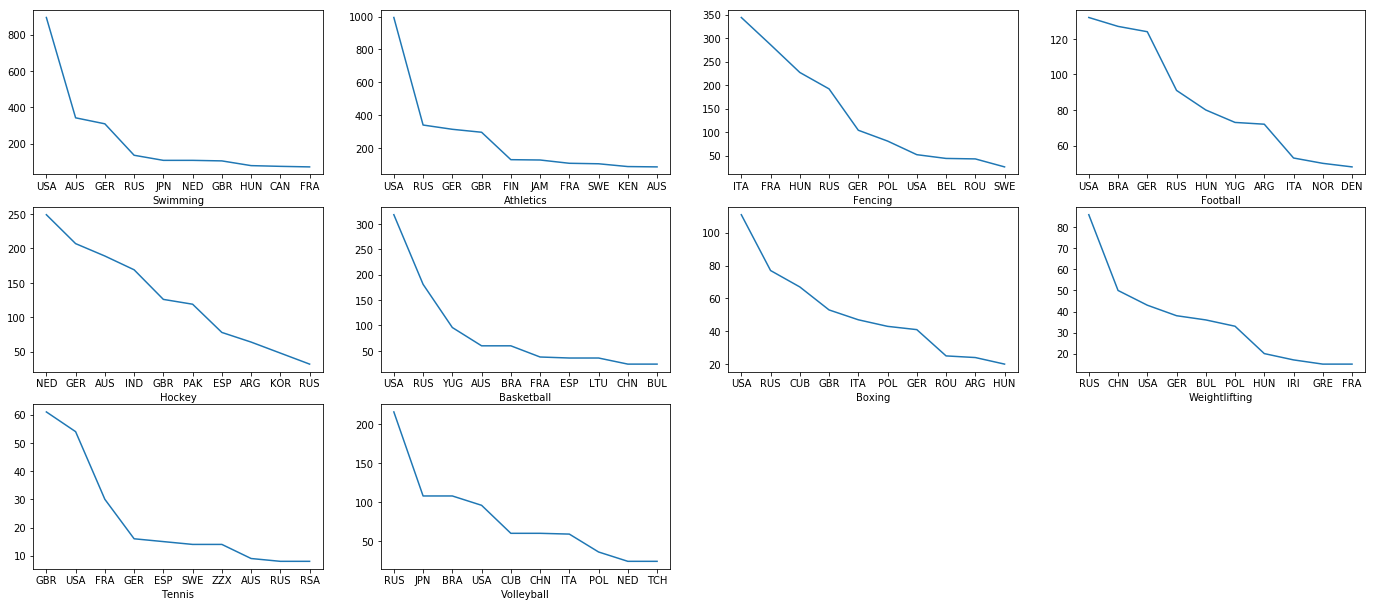

In [94]:
for x in range(len(top10_all)):
    plt.subplot(4,4,x+1)
    plt.plot(top10_all[x][1])
    plt.xlabel(top10_all[x][0])
plt.gcf().set_size_inches(18.5, 10.5)
plt.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
plt.show()
    

In [91]:
#TO be Updated